# Grape Disease prediction using Machine Learning

### User defined functions

In [125]:
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score

def print_scores(y_pred, y_test, model):
    # Testing Accuracy
    score = model.score(X_test, Y_test)
    print('Testing accuracy: %.2f' % (score * 100))
    
    # Precision Score
    score = precision_score(Y_pred, Y_test, average = 'macro')
    print('Precision Score: %.2f' % score)
    
    # Recall Score
    score = recall_score(Y_pred, Y_test, average = 'macro')
    print('Recall Score: %.2f' % score)
    
    # F1 Score
    score = f1_score(Y_pred, Y_test, average = 'macro')
    print('F1 Score: %.2f' % score)
    
def get_predictions(feature_set, le):
    prediction = model.predict(feature_set)
    attribute = le.inverse_transform(prediction)[0]
    print('{} chances of Downy Mildew'.format(attribute.upper()))

## 1. Preprocessing

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [127]:
df = pd.read_csv('Disease_Data.csv')
print('Shape of dataset:', df.shape)
df.head()

Shape of dataset: (721, 7)


,Airtemp_min,Airtemp_max,RelHum_min,RelHum_max,Rain,PGS,Disease_Risk
0,22.8,27.7,81.1,97.1,1.5,35,Medium
1,22.1,28.9,74.1,99.0,0.7,36,Medium
2,22.1,30.2,69.1,100.0,0.1,37,Medium
3,21.9,30.1,68.0,100.0,0.9,38,Medium
4,21.5,27.6,74.0,100.0,0.0,39,Medium


In [128]:
# To display statistics about data
df.describe()

,Airtemp_min,Airtemp_max,RelHum_min,RelHum_max,Rain,PGS
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,16.351484,30.181262,44.549293,89.420610,2.669958,101.947295
std,5.359814,2.619022,19.637498,12.260883,10.467854,49.776779
min,1.000000,13.700000,8.600000,38.000000,0.000000,35.000000
25%,12.000000,28.900000,29.000000,81.000000,0.000000,71.000000
50%,16.710000,30.380000,39.000000,95.610000,0.000000,80.000000
75%,21.700000,31.960000,63.000000,99.000000,0.000000,139.000000
max,24.200000,36.230000,86.000000,100.000000,81.750000,239.000000


In [129]:
# Basic Info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airtemp_min   721 non-null    float64
 1   Airtemp_max   721 non-null    float64
 2   RelHum_min    721 non-null    float64
 3   RelHum_max    721 non-null    float64
 4   Rain          721 non-null    float64
 5   PGS           721 non-null    int64  
 6   Disease_Risk  721 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 39.6+ KB


In [130]:
# To display number of samples of each class
df['Disease_Risk'].value_counts()

Low       318
High      273
Medium    130
Name: Disease_Risk, dtype: int64

Text(0, 0.5, 'Frequency')

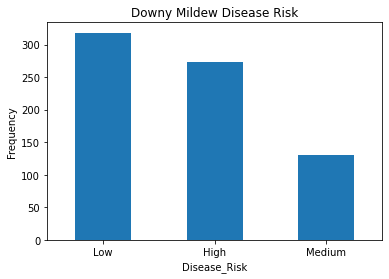

In [131]:
count_class = pd.value_counts(df['Disease_Risk'], sort=True)
count_class.plot(kind = 'bar', rot=0)
plt.title("Downy Mildew Disease Risk")
plt.xticks(range(3))
plt.xlabel('Disease_Risk')
plt.ylabel('Frequency')

In [132]:
# check for null values
df.isnull().sum()

Airtemp_min     0
Airtemp_max     0
RelHum_min      0
RelHum_max      0
Rain            0
PGS             0
Disease_Risk    0
dtype: int64

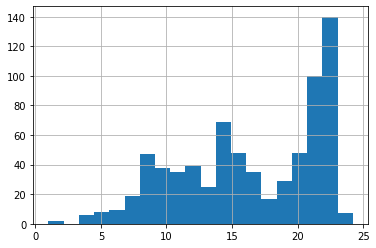

In [133]:
df['Airtemp_min'].hist(bins = 20)

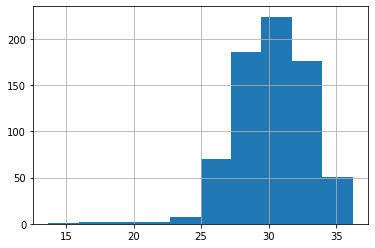

In [134]:
df['Airtemp_max'].hist()

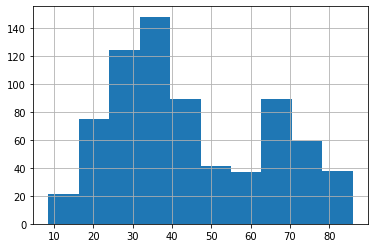

In [135]:
df['RelHum_min'].hist()

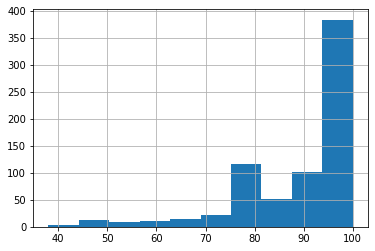

In [136]:
df['RelHum_max'].hist()

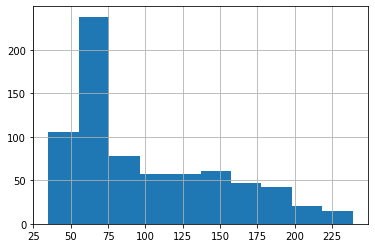

In [137]:
df['PGS'].hist()

In [138]:
# Scatterplot
Risk = ['Low','Medium','High']

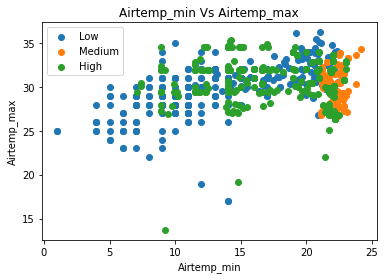

In [139]:
for i in range(3):
    x=df[df['Disease_Risk'] == Risk[i]]
    plt.scatter(x['Airtemp_min'],x['Airtemp_max'],label=Risk[i])
plt.xlabel('Airtemp_min')
plt.ylabel('Airtemp_max')
plt.title('Airtemp_min Vs Airtemp_max')
plt.legend()
plt.show()

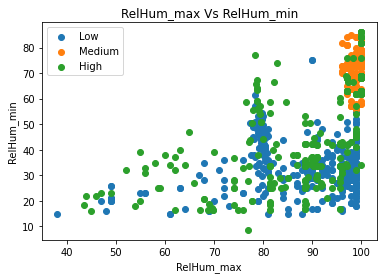

In [140]:
for i in range(3):
    x=df[df['Disease_Risk'] == Risk[i]]
    plt.scatter(x['RelHum_max'],x['RelHum_min'],label=Risk[i])
plt.xlabel('RelHum_max')
plt.ylabel('RelHum_min')
plt.title('RelHum_max Vs RelHum_min')
plt.legend()
plt.show()

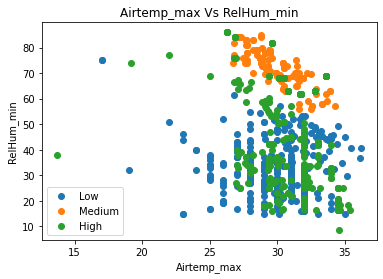

In [141]:
for i in range(3):
    x=df[df['Disease_Risk'] == Risk[i]]
    plt.scatter(x['Airtemp_max'],x['RelHum_min'],label=Risk[i])
plt.xlabel('Airtemp_max')
plt.ylabel('RelHum_min')
plt.title('Airtemp_max Vs RelHum_min')
plt.legend()
plt.show()

In [142]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Disease_Risk'] = le.fit_transform(df.Disease_Risk.values)
df.head()

,Airtemp_min,Airtemp_max,RelHum_min,RelHum_max,Rain,PGS,Disease_Risk
0,22.8,27.7,81.1,97.1,1.5,35,2
1,22.1,28.9,74.1,99.0,0.7,36,2
2,22.1,30.2,69.1,100.0,0.1,37,2
3,21.9,30.1,68.0,100.0,0.9,38,2
4,21.5,27.6,74.0,100.0,0.0,39,2


In [143]:
Disease=np.unique(df.Disease_Risk)
Disease_Risk_encod=le.inverse_transform(np.unique(df.Disease_Risk))
result = {}
for Disease, Disease_Risk_encod in zip(Disease, Disease_Risk_encod):
    result[Disease] = Disease_Risk_encod

print(result)

{0: 'High', 1: 'Low', 2: 'Medium'}


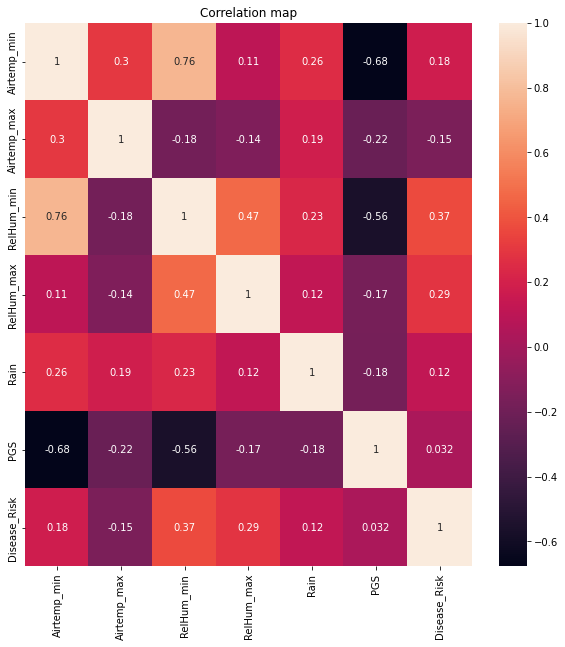

In [144]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(corr, annot=True, ax = ax)
plt.title('Correlation map')
plt.show()

In [145]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Disease_Risk'])
Y = df['Disease_Risk']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [146]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [147]:
X_train

array([[ 1.17612026, -0.47449513,  1.57210279,  0.82337317, -0.26397624,
        -0.92388694],
       [-0.21743282,  0.6785722 , -1.12275233,  0.66161248, -0.26397624,
        -0.16801712],
       [-1.31760631,  0.306615  , -1.22256178,  0.17633039, -0.26397624,
         2.57698383],
       ...,
       [ 1.02943046, -1.21840953,  1.97134059,  0.82337317, -0.26397624,
        -0.76475645],
       [-0.58415732,  0.60418076, -1.42218068, -3.3824049 , -0.26397624,
         0.82654844],
       [ 1.08443914, -0.88364805,  1.67191224,  0.74249282, -0.26397624,
        -1.00345219]])

In [148]:
X_test

array([[ 1.19316909, -0.35487365,  1.17835225,  0.76093735, -0.16854126,
        -1.32225173],
       [ 0.98535572, -0.26711454,  0.45892986, -0.01690066, -0.2421825 ,
        -0.64779515],
       [ 1.0969592 , -1.07290271,  1.65234942,  0.76093735, -0.2421825 ,
        -1.05655672],
       ...,
       [ 0.73136161,  0.12381239,  1.2310186 ,  0.92678767, -0.22114215,
        -0.7908617 ],
       [ 0.6543937 ,  0.72216995,  0.07235883,  0.84386251, -0.2421825 ,
        -0.27990974],
       [ 0.46197392,  0.72216995, -0.19097293,  0.84386251, -0.2421825 ,
        -0.5047286 ]])

In [149]:
features1 = np.array([[22.9,27.8,81.0,97.0,1.6,35]]) #medium
features2 = np.array([[19.3,33.6,69,100,2.4,71]]) #high
features3 = np.array([[9.0,34.0,17.0,85.0,0.0,235]]) #Low
features4 = np.array([[9.1,34.5,16.0,84.0,0.0,234]]) #Low
features5 = np.array([[19.0,33.0,68.0,99,2.1,73]]) #high

data1 = sc.transform(features1)
data2 = sc.transform(features2)
data3 = sc.transform(features3)
data4 = sc.transform(features4)
data5 = sc.transform(features5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid 

### A. Logistic Regression

In [150]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [151]:
# model training
model.fit(X_train, Y_train)

LogisticRegression()

In [152]:
Y_pred = model.predict(X_test)

In [153]:
print_scores(Y_pred, Y_test, model)
get_predictions(data1, le)
get_predictions(data2, le)
get_predictions(data3, le)
get_predictions(data4, le)
get_predictions(data5, le)

Testing accuracy: 95.50
Precision Score: 0.96
Recall Score: 0.93
F1 Score: 0.94
MEDIUM chances of Downy Mildew
HIGH chances of Downy Mildew
LOW chances of Downy Mildew
LOW chances of Downy Mildew
HIGH chances of Downy Mildew


In [154]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[104   0  12]
 [  1 125   0]
 [  0   0  47]]


### B. K-Nearest Neighbor Classifier

In [155]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier() # Default n_neighbours is 5

In [156]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [157]:
Y_pred = model.predict(X_test)
print_scores(Y_pred, Y_test, model)
get_predictions(data1, le)
get_predictions(data2, le)
get_predictions(data3, le)
get_predictions(data4, le)
get_predictions(data5, le)

Testing accuracy: 95.16
Precision Score: 0.96
Recall Score: 0.93
F1 Score: 0.94
MEDIUM chances of Downy Mildew
HIGH chances of Downy Mildew
LOW chances of Downy Mildew
LOW chances of Downy Mildew
HIGH chances of Downy Mildew


In [158]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[104   4   8]
 [  1 125   0]
 [  1   0  46]]


### C. Decision Tree Classifier

In [159]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier()

In [160]:
model5.fit(X_train, Y_train)

DecisionTreeClassifier()

In [161]:
Y_pred = model5.predict(X_test)
print_scores(Y_pred, Y_test, model)
get_predictions(data1, le)
get_predictions(data2, le)
get_predictions(data3, le)
get_predictions(data4, le)
get_predictions(data5, le)

Testing accuracy: 95.16
Precision Score: 0.99
Recall Score: 0.97
F1 Score: 0.98
MEDIUM chances of Downy Mildew
HIGH chances of Downy Mildew
LOW chances of Downy Mildew
LOW chances of Downy Mildew
HIGH chances of Downy Mildew


In [162]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[112   0   4]
 [  1 125   0]
 [  0   0  47]]


### E. Support Vector Classifier

In [163]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')
model.fit(X_train, Y_train)

SVC()

In [164]:
Y_pred = model.predict(X_test)
print_scores(Y_pred, Y_test, model)
get_predictions(data1, le)
get_predictions(data2, le)
get_predictions(data3, le)
get_predictions(data4, le)
get_predictions(data5, le)

Testing accuracy: 93.43
Precision Score: 0.95
Recall Score: 0.91
F1 Score: 0.92
MEDIUM chances of Downy Mildew
HIGH chances of Downy Mildew
LOW chances of Downy Mildew
LOW chances of Downy Mildew
HIGH chances of Downy Mildew


### F. Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(X_train, Y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [166]:
Y_pred = model.predict(X_test)
print_scores(Y_pred, Y_test, model)
get_predictions(data1, le)
get_predictions(data2, le)
get_predictions(data3, le)
get_predictions(data4, le)
get_predictions(data5, le)

Testing accuracy: 97.58
Precision Score: 0.97
Recall Score: 0.96
F1 Score: 0.97
MEDIUM chances of Downy Mildew
HIGH chances of Downy Mildew
LOW chances of Downy Mildew
LOW chances of Downy Mildew
HIGH chances of Downy Mildew


## Voting Classifier

In [167]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier

In [168]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier()
model4 = DecisionTreeClassifier()
model = VotingClassifier(estimators=[('lr',model1),('kn',model2),('rf',model3),('dt',model4)],voting='soft')
model.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('kn', KNeighborsClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [169]:
Y_pred = model.predict(X_test)
print_scores(Y_pred, Y_test, model)
get_predictions(data1, le)
get_predictions(data2, le)
get_predictions(data3, le)
get_predictions(data4, le)
get_predictions(data5, le)

Testing accuracy: 98.27
Precision Score: 0.99
Recall Score: 0.97
F1 Score: 0.98
MEDIUM chances of Downy Mildew
HIGH chances of Downy Mildew
LOW chances of Downy Mildew
LOW chances of Downy Mildew
HIGH chances of Downy Mildew


In [170]:
import pickle
pickle.dump(model,open('model5.pkl','wb'))